In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
import numpy as np
import seaborn as sns
import json
from pathlib import Path
from scipy.stats import mannwhitneyu
sns.set(style='ticks', palette='deep')
%load_ext autoreload
%autoreload 2

### loading, changing/combining the fish dfs

In [2]:
#load all fish df
all_fish= pd.read_json(r'')
all_fish

,fish id,genotype,age,comments,n_left_pause,n_left_stim_r,n_left_stim_l,n_right_pause,n_right_stim_r,n_right_stim_l,...,angles_pause,angles_stim_r,angles_stim_l,mean_bdur_pause,mean_bdur_stim,mean_ibi_pause,mean_ibi_stim,mean_vel,mean_disp_pause,mean_disp_stim
0,221103_f50,injected,6,,12,6,39,21,50,1,...,"[2.1622798491, -1.4340313271, -5.628419882, 5....","[11.0326552563, 7.5293622088, 26.7904873581, 9...","[0.027586127800000002, -329.6289726498, 0.2853...",0.289261,0.452122,0.848538,1.041897,6.920217,1.693735,2.741387
1,221103_f32,injected,6,,6,5,77,5,49,6,...,"[5.1141729149, 2.768963852, 5.889300774, -23.2...","[23.314251308, 48.5205595552, 33.4508893626, 3...","[-2.3610794625000002, -18.6890617012, -73.6311...",0.132427,0.270208,0.887787,0.823120,5.836269,0.590590,1.927476
2,221103_f35,wt,6,,5,3,75,10,84,1,...,"[17.2649104781, 0.7222479939, 5.5764174958, 7....","[96.4650076764, -3.397289724, -46.350836222, -...","[-119.7969384726, -69.524752474, -118.43371588...",0.121097,0.473254,1.172375,1.022568,6.752201,0.531570,3.854902
3,221103_f51,wt,6,,29,16,113,17,87,3,...,"[22.5811574446, 22.1545375222, 53.9616187931, ...","[-1.354290504, 40.4242043853, -2.3995456542, -...","[-55.9995740929, -63.5092824827, -7.4305819264...",0.157868,0.295334,0.518389,0.638940,5.692286,0.740496,1.988583
4,221103_f34,injected,6,,15,0,98,20,103,1,...,"[0.4182681938, -22.9085766288, -3.9702023398, ...","[55.6597395151, 31.3108035899, 64.9079038339, ...","[0.5953177362000001, -2.3120751201, 1.03944335...",0.181095,0.377404,1.204862,0.865420,6.970308,1.015044,2.790832
5,221103_f33,wt,6,,6,3,113,7,118,0,...,"[3.5934354009000002, 41.2634937103, 6.28987308...","[68.5158867308, -31.6057649887, -33.1162262695...","[-48.0098035194, -90.704832422, -66.2613931823...",0.131245,0.328759,1.361978,0.727914,8.316348,0.637647,2.752544
6,221103_f5,wt,6,,21,12,78,13,59,9,...,"[-33.6722716362, 44.0418989557, 45.627459967, ...","[-11.8654192162, -2.6431750782, -6.5665232797,...","[0.1087650663, -24.2152492229, -1.1145046611, ...",0.165069,0.296582,0.977817,0.970804,6.576742,0.985478,2.001174
7,221103_f2,injected,6,,15,20,13,1,12,0,...,"[-49.3653095672, 0.947037745, 0.1049062949, -0...","[-31.97063746, -25.0440030401, -8.6608802436, ...","[-4.8623025084, -42.0160299856, -3.7144518932,...",0.240261,0.287988,1.273769,1.630905,6.473617,1.928178,2.287031
8,221103_f3,wt,6,,4,1,49,7,54,0,...,"[44.6712669995, -5.5895368852, -18.3594048781,...","[-0.015556394000000001, 10.1874355652, 4.42052...","[-8.3759872254, -9.5537799767, -46.5772364576,...",0.141051,0.254851,0.907022,0.798073,5.242057,0.578756,1.554791
9,221103_f4,injected,6,,24,7,80,11,62,6,...,"[34.7617372181, -1.1478184374, -0.6467903545, ...","[52.4855517356, 72.6099791796, 32.8949519464, ...","[-48.7514893307, -45.9304397551, -10.134938579...",0.199626,0.386560,1.006634,1.026280,6.065829,0.951622,2.522078


In [2]:
# if i need to combine multiple data frames, for example, several batches

#load all dfs first:
all_fish1= pd.read_json(r'')
all_fish2= pd.read_json(r'')
#... add mroe dfs if needed

#combine all dfs into the all_fish df: (add more as needed)
all_fish=pd.concat([all_fish1, all_fish2], ignore_index=True)
all_fish

,fish id,genotype,age,comments,n_left_pause,n_left_stim_r,n_left_stim_l,n_right_pause,n_right_stim_r,n_right_stim_l,...,angles_pause,angles_stim_r,angles_stim_l,mean_bdur_pause,mean_bdur_stim,mean_ibi_pause,mean_ibi_stim,mean_vel,mean_disp_pause,mean_disp_stim
0,220721_f42,inj,6,,4,0,90,2,96,3,...,"[-45.642526657, -76.7401152284, 6.5675476156, ...","[55.6322300305, 61.7527148554, 64.7939333727, ...","[-0.47633877500000005, -44.0281304003, -33.694...",0.155574,0.268941,1.406237,0.964469,8.066975,1.260115,2.185155
1,220721_f45,wt,6,,36,17,39,25,56,15,...,"[25.1110173506, 33.4859582937, 9.4444311001, 1...","[1.8358536103, -54.1323376992, -24.1568560552,...","[-5.294789836, -51.0768226123, -88.2113180239,...",0.267540,0.526778,0.962275,1.091988,7.345315,1.928613,4.244240
2,220721_f8,inj,6,,20,6,75,6,50,2,...,"[-29.7604051914, -59.956628068, -1.0737411738,...","[-12.3596582063, -32.0999867802, -23.386278826...","[0.0331803454, -7.8829673554, -3.5437404786, -...",0.181711,0.194729,0.788902,0.825634,6.801603,1.259146,1.494952
3,220721_f1,wt,6,,28,4,87,8,80,0,...,"[36.2531034313, 5.5341331304, 33.0165107945, 3...","[12.1910966463, 35.2274250442, 3.4936978894, 8...","[-12.4451724035, -74.77019951770001, -59.54774...",0.206200,0.353060,1.023872,0.892260,8.693191,1.287140,3.191842
4,220721_f6,inj,6,,18,7,22,3,60,21,...,"[-0.06905201300000001, -0.8752869056, 4.436101...","[14.6556876249, 6.2121270864, -19.849379184100...","[-1.1968219406, 17.831219966, 57.2391656183, 1...",0.126730,0.189000,0.825679,1.008949,8.152845,0.773508,1.893860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,221103_f49,wt,6,,22,10,55,11,52,8,...,"[17.0675386279, 2.4265796165999998, 6.69793755...","[47.2029064292, 36.6593356256, 153.0760649387,...","[-2.2865809942, 10.1623950899, -34.3845942627,...",0.404756,0.606549,1.115909,1.118323,7.358893,2.907903,5.118000
100,221103_f22,injected,6,,15,10,40,21,51,14,...,"[-25.6857683398, 2.9579824728, 1.1824537819, 5...","[20.897242772, 50.8830160283, 20.8386052163, 6...","[-58.0719879904, -36.4943251199, 0.7176642471,...",0.200238,0.269152,0.729124,0.697281,6.103496,1.054294,1.816810
101,221103_f25,wt,6,,24,5,47,9,44,9,...,"[3.959041251, 13.8236468835, 3.6245946736, 6.7...","[-0.1626287995, -44.2444163865, -32.691303254,...","[-1.628257439, -50.863063924, 0.78175904660000...",0.280173,0.451103,0.830744,1.071757,8.178063,1.978052,3.957517
102,221103_f13,wt,6,,15,6,47,8,62,11,...,"[-0.1221983283, 22.1224580068, -2.1365618131, ...","[2.8393800137, 11.7635466956, 42.4874549662, 4...","[-56.084343985, -61.4470887429, -70.3980178475...",0.183830,0.410095,0.973154,0.972469,8.031046,1.377171,3.900253


In [3]:
#this is the path where i save all figs/updated df
path_save = Path(r'')

In [53]:
#save updated/combined df
all_fish.to_json(str(path_save)+'/updated_all_pool.json')

### some functions and variables 

In [4]:
wt_col='#5D5D5D'
mut_col='#BE4830'
#need to change here depending on the genotype
pal= {"wt": '#5D5D5D', "inj":'#BE4830'}

In [5]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], facecolor=color, alpha=0.5)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

    
# getting all angles from various stim times (either bins or whole stim1 vs stim2)
def get_angles(df):
    stim_p_angles=[]
    stim_r_angles=[]
    stim_l_angles=[]

    for i in range(len(df)):
        stim_p_angles.append(df.angles_pause.iloc[i])
        stim_r_angles.append(df.angles_stim_r.iloc[i])
        stim_l_angles.append(df.angles_stim_l.iloc[i])

        #unpack from the list of angle arrays    
    angles_p=[item for sublist in stim_p_angles for item in sublist]
    angles_r=[item for sublist in stim_r_angles for item in sublist]
    angles_l=[item for sublist in stim_l_angles for item in sublist]
    return (angles_p, angles_r, angles_l) 


def plot_params(param_1_df1, param_1_df2, param_2_df1, param_2_df2):

    stim1_1=ax[0].boxplot(param_1_df1, positions=[1], sym='', widths=0.6, patch_artist=True)
    stim1_2=ax[0].boxplot(param_1_df2, positions=[2], sym='', widths=0.6, patch_artist=True)

    stim2_1=ax[1].boxplot(param_2_df1, positions=[1], sym='', widths=0.6, patch_artist=True)
    stim2_2=ax[1].boxplot(param_2_df2, positions=[2], sym='', widths=0.6, patch_artist=True)

    set_box_color(stim1_1, wt_col) 
    set_box_color(stim1_2, mut_col) 
    set_box_color(stim2_1, wt_col)
    set_box_color(stim2_2, mut_col)

    ax[0].set_xticklabels(['wt', 'mutant'], size=14)
    ax[0].set_title('During Pause')

    ax[1].set_xticklabels(['wt', 'mutant'], size=14)
    fig.subplots_adjust(wspace=0.2, hspace=0.3)
    ax[1].set_title('During stimulus')
    #plt.text(7.1, 40, 'n = '+str(len(all_fish_new)), fontsize=12)
    sns.despine()

In [23]:
#dividing the df into mutant vs wt (sometimes need to change 'genotype' with 'comments'- adjust based on the mutant tested each time)
df1=all_fish[all_fish['genotype']=='wt'].reset_index(drop=True)
df2=all_fish[all_fish['genotype']=='inj'].reset_index(drop=True)

### Plotting 

In [61]:
#File where all p values and test are saved
file_path= path_save / 'p_values_results.txt'

with open(file_path, "w") as f:
    f.write("P-values for each metric:\n\n")

<IPython.core.display.Javascript object>


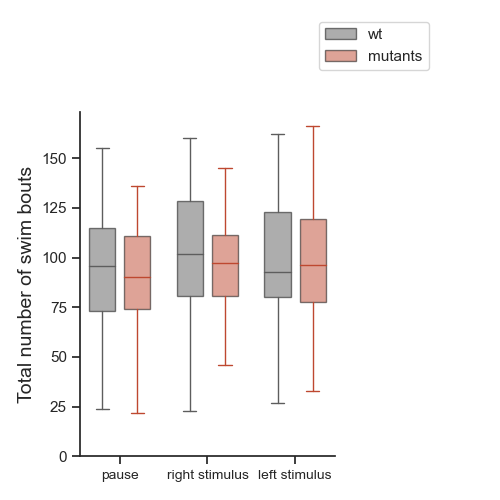

pause:  MannwhitneyuResult(statistic=1465.5, pvalue=0.46250387617118927)
right stim:  MannwhitneyuResult(statistic=1491.5, pvalue=0.36607207750284987)
left stim:  MannwhitneyuResult(statistic=1366.0, pvalue=0.9300494325388083)


In [29]:
# plotting total number of bouts (including forward swims) separated by stims and groups

n_total_pause_df1=df1.n_left_pause+df1.n_right_pause+df1.n_forward_pause
n_total_right_df1=df1.n_left_stim_r+df1.n_right_stim_r+df1.n_forward_stim_r
n_total_left_df1=df1.n_left_stim_l+df1.n_right_stim_l+df1.n_forward_stim_l

n_total_pause_df2=df2.n_left_pause+df2.n_right_pause+df2.n_forward_pause
n_total_right_df2=df2.n_left_stim_r+df2.n_right_stim_r+df2.n_forward_stim_r
n_total_left_df2=df2.n_left_stim_l+df2.n_right_stim_l+df2.n_forward_stim_l

ticks=['pause', 'right stimulus','left stimulus']


n_total_ct= [n_total_pause_df1, n_total_right_df1, n_total_left_df1]
n_total_mut= [n_total_pause_df2, n_total_right_df2, n_total_left_df2]

fig, ax=plt.subplots( figsize=(5,5))

fr_ct=ax.boxplot(n_total_ct, positions=np.array(range(3))*2.0-0.4, sym='', widths=0.6, patch_artist=True)
fr_mut=ax.boxplot(n_total_mut, positions=np.array(range(3))*2.0+0.4, sym='', widths=0.6, patch_artist=True)

set_box_color(fr_ct, wt_col) 
set_box_color(fr_mut, mut_col)

ax.set_ylabel('Total number of swim bouts', size=14)
#ax.set_title('Total number of bouts including forward swims', size=14)
ax.set_xticks([0,2, 4])
ax.set_xticklabels(ticks, size=10)

ax.set_yticks([0, 25, 50, 75, 100, 125, 150])  # change here if need to adjust y axis limits
ax.legend([fr_ct["boxes"][0], fr_mut["boxes"][0]], ['wt', 'mutants'], loc='lower right',  bbox_to_anchor=(1.4,1.1))
plt.tight_layout()

sns.despine()
plt.savefig(str(path_save) +'/total_number_of_bouts_w_forward.jpeg', bbox_inches='tight')

print('pause: ', mannwhitneyu (n_total_ct[0], n_total_mut[0]))
print('right stim: ', mannwhitneyu (n_total_ct[1], n_total_mut[1]))
print('left stim: ', mannwhitneyu (n_total_ct[2], n_total_mut[2]))
# with open(file_path, "a") as f:
#     f.write(f"Results for total number of bouts (including forward swims):\n")
#     f.write(f"pause: statistic={mannwhitneyu(n_total_ct[0], n_total_mut[0]).statistic}, p-value={mannwhitneyu(n_total_ct[0], n_total_mut[0]).pvalue}\n")
#     f.write(f"right stim: statistic={mannwhitneyu(n_total_ct[1], n_total_mut[1]).statistic}, p-value={mannwhitneyu(n_total_ct[1], n_total_mut[1]).pvalue}\n")
#     f.write(f"left stim: statistic={mannwhitneyu(n_total_ct[2], n_total_mut[2]).statistic}, p-value={mannwhitneyu(n_total_ct[2], n_total_mut[2]).pvalue}\n\n")

<IPython.core.display.Javascript object>


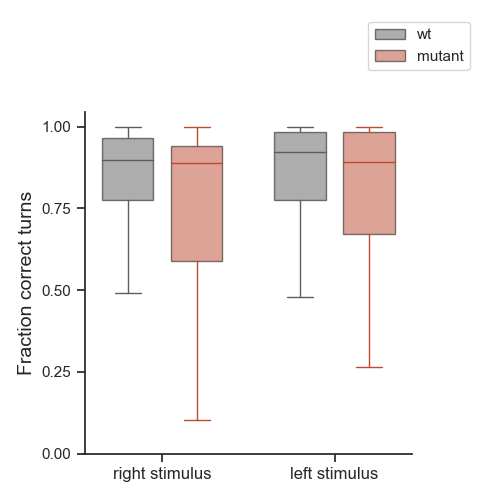

right stimulus:  MannwhitneyuResult(statistic=1494.5, pvalue=0.3558616633126376)
left stimulus:  MannwhitneyuResult(statistic=1385.5, pvalue=0.8296890287319638)


In [30]:
# fr correct just between left and right
fr_corr_new_stim_r_wt=[]
fr_corr_new_stim_l_wt=[]
fr_corr_new_stim_r_mut=[]
fr_corr_new_stim_l_mut=[]

for i in range(len(df1)):
    fr_corr_new_stim_r_wt.append(df1.iloc[i].n_right_stim_r/(df1.iloc[i].n_right_stim_r+df1.iloc[i].n_left_stim_r))
    fr_corr_new_stim_l_wt.append(df1.iloc[i].n_left_stim_l/(df1.iloc[i].n_right_stim_l+df1.iloc[i].n_left_stim_l))

for j in range(len(df2)):
    fr_corr_new_stim_r_mut.append(df2.iloc[j].n_right_stim_r/(df2.iloc[j].n_right_stim_r+df2.iloc[j].n_left_stim_r))
    fr_corr_new_stim_l_mut.append(df2.iloc[j].n_left_stim_l/(df2.iloc[j].n_right_stim_l+df2.iloc[j].n_left_stim_l))
    
ticks=['right stimulus','left stimulus']


fr_new_c_ct= [fr_corr_new_stim_r_wt, fr_corr_new_stim_l_wt]
fr_new_c_mut= [fr_corr_new_stim_r_mut,fr_corr_new_stim_l_mut]

fig, ax=plt.subplots( figsize=(5,5))

fr_ct=ax.boxplot(fr_new_c_ct, positions=np.array(range(2))*2.0-0.4, sym='', widths=0.6, patch_artist=True)
fr_mut=ax.boxplot(fr_new_c_mut, positions=np.array(range(2))*2.0+0.4, sym='', widths=0.6, patch_artist=True)

set_box_color(fr_ct, wt_col) 
set_box_color(fr_mut, mut_col)

ax.set_ylabel('Fraction correct turns', size=14)
ax.set_xticks([0,2])
ax.set_xticklabels(ticks, size=12)
#ax.set_title('Fraction correct turns (turns only)', size=14)
ax.set_yticks([0,0.25, 0.5,0.75,1])
ax.legend([fr_ct["boxes"][0], fr_mut["boxes"][0]], ['wt', 'mutant'], loc='lower right',  bbox_to_anchor=(1.2,1.1))
plt.tight_layout()

sns.despine()
#plt.savefig(str(path_save) +'/fraction_correct_turns.jpeg', bbox_inches='tight')
print('right stimulus: ', mannwhitneyu (fr_corr_new_stim_r_wt,fr_corr_new_stim_r_mut))
print('left stimulus: ', mannwhitneyu (fr_corr_new_stim_l_wt,fr_corr_new_stim_l_mut))

# with open(file_path, "a") as f:
#     f.write(f"Results for the fraction of correct turns (stimulus only):\n")
#     f.write(f"right stim: statistic={mannwhitneyu(fr_corr_new_stim_r_wt,fr_corr_new_stim_r_mut).statistic}, p-value={mannwhitneyu(fr_corr_new_stim_r_wt,fr_corr_new_stim_r_mut).pvalue}\n")
#     f.write(f"left stim: statistic={mannwhitneyu(fr_corr_new_stim_l_wt,fr_corr_new_stim_l_mut).statistic}, p-value={mannwhitneyu(fr_corr_new_stim_l_wt,fr_corr_new_stim_l_mut).pvalue}\n\n")

<IPython.core.display.Javascript object>


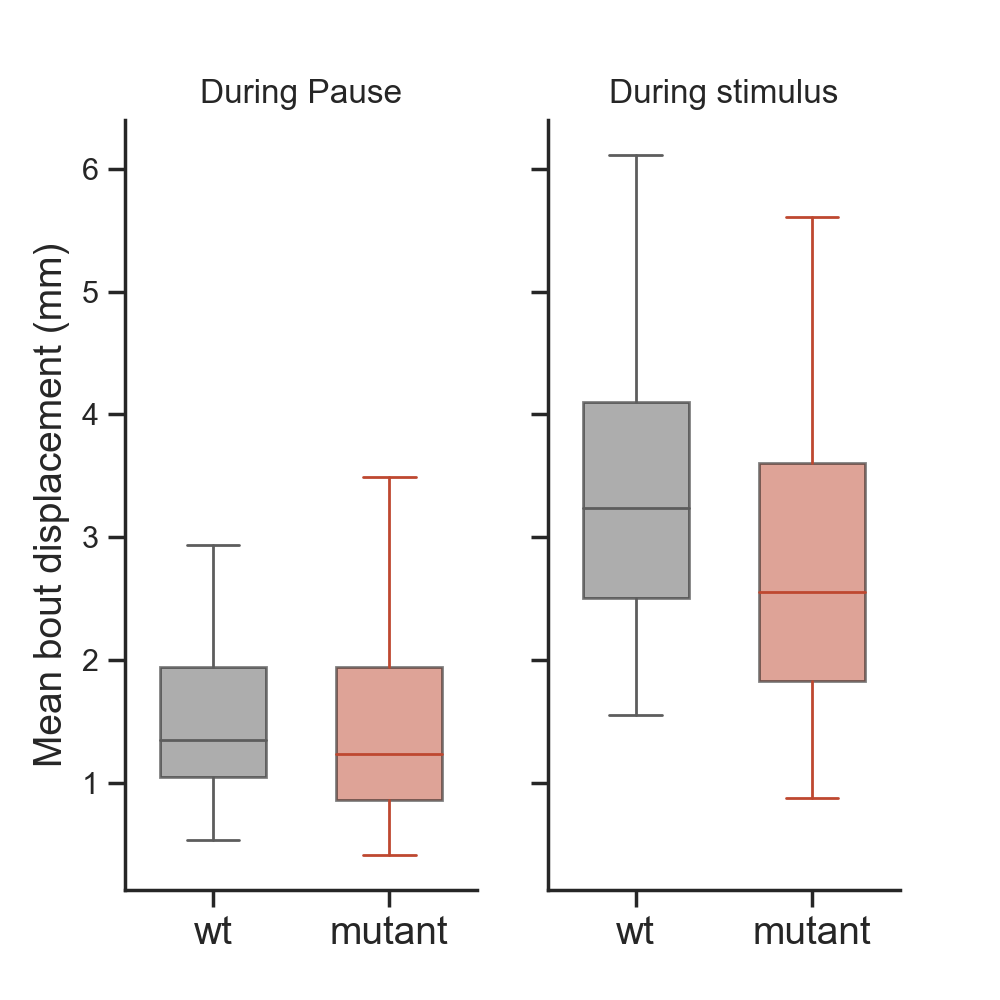

during pause:  MannwhitneyuResult(statistic=1509.0, pvalue=0.3089462066993832)
during stim:  MannwhitneyuResult(statistic=1754.0, pvalue=0.009048231556730235)


In [104]:
# mean bout displacement
fig, ax=plt.subplots(1, 2, figsize=(5,5), sharey=True)
plot_params(df1.mean_disp_pause.dropna(), df2.mean_disp_pause.dropna(), df1.mean_disp_stim.dropna(), df2.mean_disp_stim.dropna())
ax[0].set_ylabel('Mean bout displacement (mm)', size=14)
plt.savefig(str(path_save) +'/mean_bdisp.jpeg', bbox_inches='tight')
print ('during pause: ', mannwhitneyu (df1.mean_disp_pause.dropna(), df2.mean_disp_pause.dropna()))
print ('during stim: ', mannwhitneyu (df1.mean_disp_stim.dropna(), df2.mean_disp_stim.dropna()))

# with open(file_path, "a") as f:
#     f.write(f"Results for mean bout displacement:\n")
#     f.write(f"during pause: statistic={mannwhitneyu(df1.mean_disp_pause.dropna(), df2.mean_disp_pause.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_disp_pause.dropna(), df2.mean_disp_pause.dropna()).pvalue}\n")
#     f.write(f"during stimulus: statistic={mannwhitneyu(df1.mean_disp_stim.dropna(), df2.mean_disp_stim.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_disp_stim.dropna(), df2.mean_disp_stim.dropna()).pvalue}\n\n")

<IPython.core.display.Javascript object>


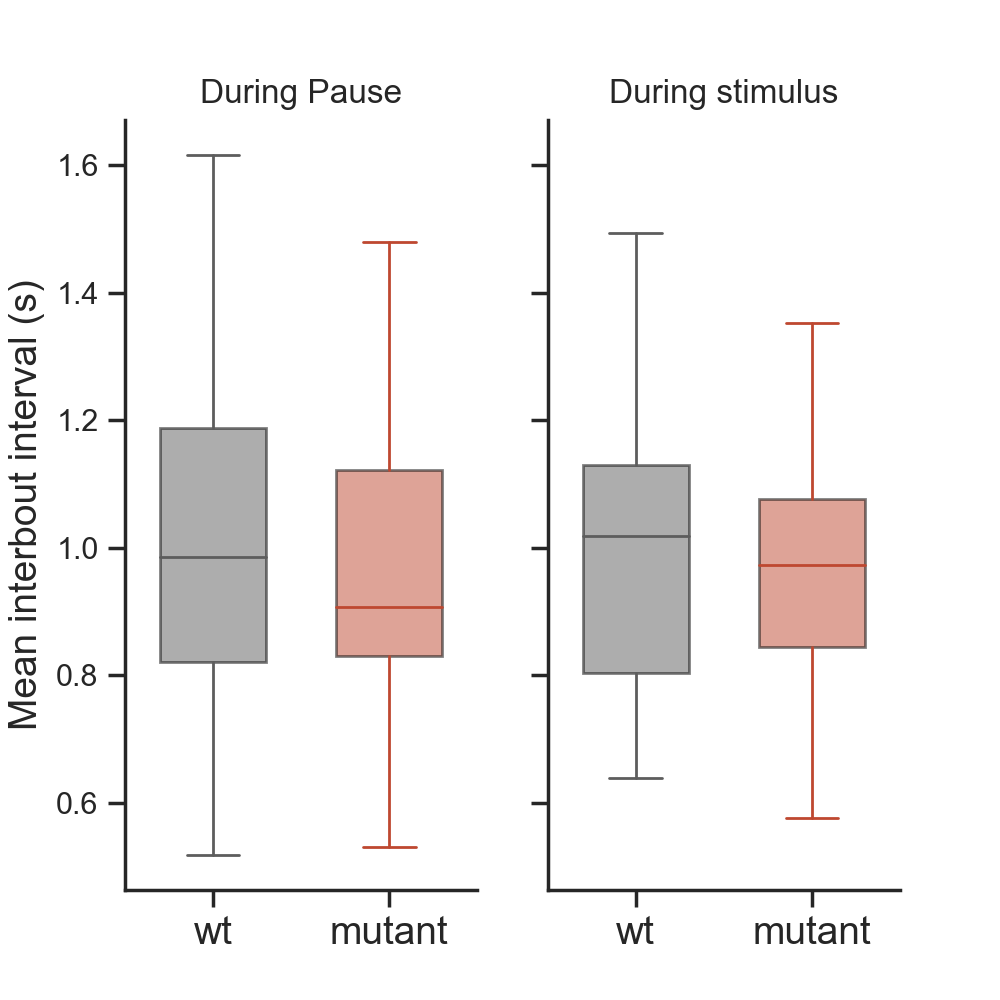

during pause:  MannwhitneyuResult(statistic=1501.0, pvalue=0.33433138066898704)
during stim:  MannwhitneyuResult(statistic=1417.0, pvalue=0.6749775071721135)


In [105]:
# mean interbout interval
fig, ax=plt.subplots(1, 2, figsize=(5,5), sharey=True)
plot_params(df1.mean_ibi_pause.dropna(), df2.mean_ibi_pause.dropna(), df1.mean_ibi_stim.dropna(), df2.mean_ibi_stim.dropna())
ax[0].set_ylabel('Mean interbout interval (s)', size=14)
plt.savefig(str(path_save) +'/interbout_int.jpeg', bbox_inches='tight')
print ('during pause: ', mannwhitneyu (df1.mean_ibi_pause.dropna(), df2.mean_ibi_pause.dropna()))
print ('during stim: ', mannwhitneyu (df1.mean_ibi_stim.dropna(), df2.mean_ibi_stim.dropna()))

# with open(file_path, "a") as f:
#     f.write(f"Results for interbout interval:\n")
#     f.write(f"during pause: statistic={mannwhitneyu(df1.mean_ibi_pause.dropna(), df2.mean_ibi_pause.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_ibi_pause.dropna(), df2.mean_ibi_pause.dropna()).pvalue}\n")
#     f.write(f"during stimulus: statistic={mannwhitneyu(df1.mean_ibi_stim.dropna(), df2.mean_ibi_stim.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_ibi_stim.dropna(), df2.mean_ibi_stim.dropna()).pvalue}\n\n")

<IPython.core.display.Javascript object>


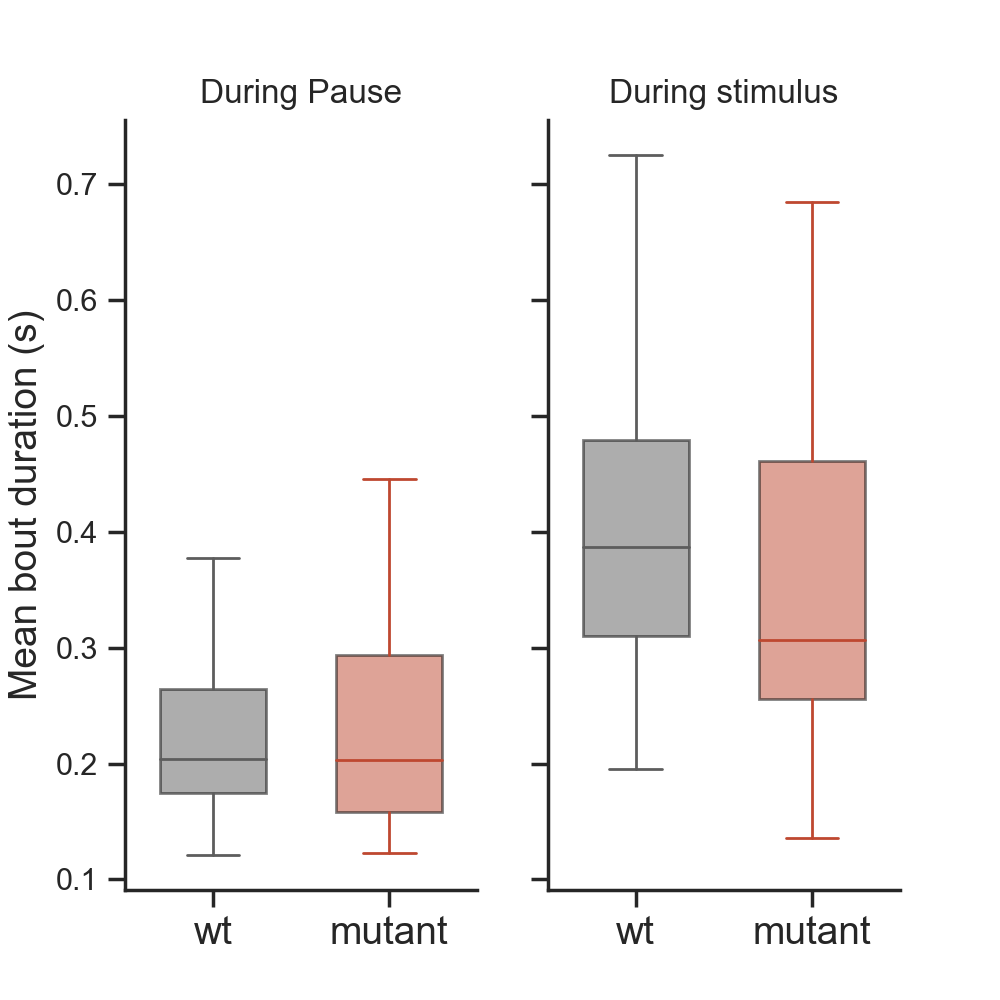

during pause:  MannwhitneyuResult(statistic=1388.0, pvalue=0.8174763006745625)
during stim:  MannwhitneyuResult(statistic=1622.0, pvalue=0.07976180955346028)


In [107]:
fig, ax=plt.subplots(1, 2, figsize=(5,5), sharey=True)
plot_params(df1.mean_bdur_pause.dropna(), df2.mean_bdur_pause.dropna(), df1.mean_bdur_stim.dropna(), df2.mean_bdur_stim.dropna())
ax[0].set_ylabel('Mean bout duration (s)', size=14)
plt.savefig(str(path_save) +'/mean_bdur.jpeg', bbox_inches='tight')
print ('during pause: ', mannwhitneyu (df1.mean_bdur_pause.dropna(), df2.mean_bdur_pause.dropna()))
print ('during stim: ', mannwhitneyu (df1.mean_bdur_stim.dropna(), df2.mean_bdur_stim.dropna()))
# with open(file_path, "a") as f:
#     f.write(f"Results for mean bout duration:\n")
#     f.write(f"during pause: statistic={mannwhitneyu(df1.mean_bdur_pause.dropna(), df2.mean_bdur_pause.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_bdur_pause.dropna(), df2.mean_bdur_pause.dropna()).pvalue}\n")
#     f.write(f"during stimulus: statistic={mannwhitneyu(df1.mean_bdur_stim.dropna(), df2.mean_bdur_stim.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_bdur_stim.dropna(), df2.mean_bdur_stim.dropna()).pvalue}\n\n")

<IPython.core.display.Javascript object>


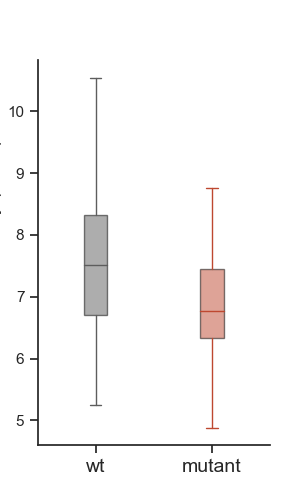

MannwhitneyuResult(statistic=1874.0, pvalue=0.0006979865560775794)


In [103]:
vel_df1=[]
vel_df2=[]

for i in range(len(df1)):
    vel_df1.append(np.mean(df1.iloc[i]['mean_vel']))

for i in range(len(df2)):
    vel_df2.append(np.mean(df2.iloc[i]['mean_vel']))
    

fig, ax=plt.subplots(figsize=(3,5), sharey=True)
stim1_1=ax.boxplot(vel_df1, positions=[1], sym='', widths=0.2, patch_artist=True)
stim1_2=ax.boxplot(vel_df2, positions=[2], sym='', widths=0.2, patch_artist=True)


set_box_color(stim1_1, wt_col) 
set_box_color(stim1_2, mut_col) 
ax.set_xticklabels(['wt', 'mutant'], size=14)
sns.despine()
ax.set_ylabel('Mean bout velocity (mm/s)', size=14)

plt.savefig(str(path_save) +'/mean_vel.jpeg', bbox_inches='tight')
print(mannwhitneyu (df1.mean_vel,df2.mean_vel))
# with open(file_path, "a") as f:
#     f.write(f"Results for mean bout velocity:\n")
#     f.write(f"statistic={mannwhitneyu(df1.mean_vel.dropna(), df2.mean_vel.dropna()).statistic}, p-value={mannwhitneyu(df1.mean_vel.dropna(), df2.mean_vel.dropna()).pvalue}\n")

### Angle distributions

In [72]:
#change these dfs depending on what i want to plot
angles_df1=get_angles(all_fish[all_fish['genotype']=='wt'])
angles_df2=get_angles(all_fish[all_fish['genotype']=='inj'])

#remove None from angles
angless_df1=[]
angless_df2=[]
for i in range(len(angles_df2)):
    angless_df1.append([x for x in angles_df1[i] if x is not None])
    angless_df2.append([y for y in angles_df2[i] if y is not None])

In [39]:
pal2= {"WT": '#5D5D5D', "Mutant":'#BE4830'}

<IPython.core.display.Javascript object>


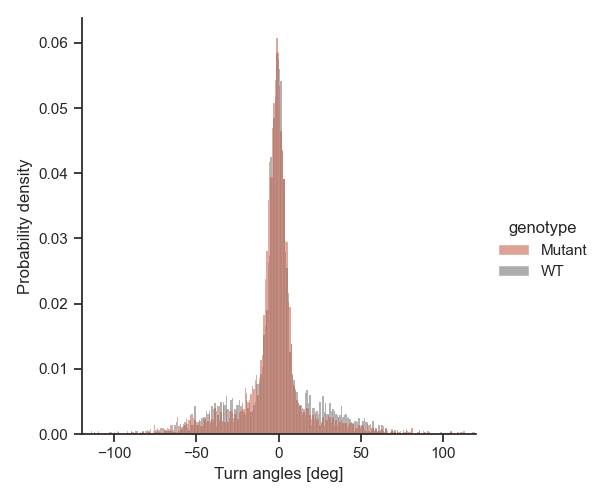

In [91]:
ang_df_p=all_fish[['genotype', 'angles_pause']]
angles_df_p=ang_df_p.explode('angles_pause', ignore_index=True)
angles_df_p = angles_df_p[(angles_df_p['angles_pause'] >= -300) & (angles_df_p['angles_pause'] <= 300)]
angles_df_p['genotype'] = angles_df_p['genotype'].replace({'wt': 'WT', 'inj': 'Mutant'})

ax=sns.displot(angles_df_p, x=angles_df_p['angles_pause'], hue='genotype', stat="density", palette=pal2, bins=500, common_norm=False)
ax.set(xlabel='Turn angles [deg]', ylabel='Probability density')

#ax.set(title='angle distribution during pause stimulus')
plt.xlim(-120,120)
ax.savefig(str(path_save) +'/angle_probs_pause.jpeg', bbox_inches='tight')

<IPython.core.display.Javascript object>


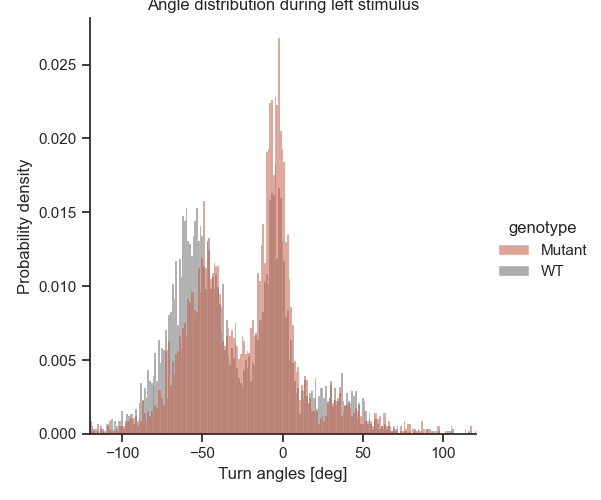

In [98]:
ang_df_p=all_fish[['genotype', 'angles_stim_l']]
angles_df_p=ang_df_p.explode('angles_stim_l', ignore_index=True)
angles_df_p['genotype'] = angles_df_p['genotype'].replace({'wt': 'WT', 'inj': 'Mutant'})
angles_df_p = angles_df_p[(angles_df_p['angles_stim_l'] >= -300) & (angles_df_p['angles_stim_l'] <= 300)]
ax=sns.displot(angles_df_p, x=angles_df_p['angles_stim_l'], hue='genotype', stat="density", bins=500, palette=pal2, common_norm=False)
ax.set(xlabel='Turn angles [deg]', ylabel='Probability density')
ax.set(title='Angle distribution during left stimulus')
plt.xlim(-120,120)
ax.savefig(str(path_save) +'/angle_probs_left.jpeg', bbox_inches='tight')

<IPython.core.display.Javascript object>


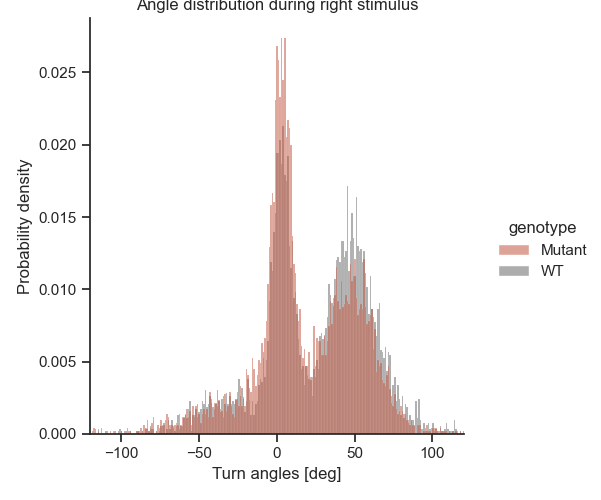

In [96]:
ang_df_p=all_fish[['genotype', 'angles_stim_r']]
angles_df_p=ang_df_p.explode('angles_stim_r', ignore_index=True)
angles_df_p['genotype'] = angles_df_p['genotype'].replace({'wt': 'WT', 'inj': 'Mutant'})
angles_df_p = angles_df_p[(angles_df_p['angles_stim_r'] >= -300) & (angles_df_p['angles_stim_r'] <= 300)]
ax=sns.displot(angles_df_p, x=angles_df_p['angles_stim_r'], hue='genotype', stat="density",palette=pal2, bins=500, common_norm=False)
ax.set(xlabel='Turn angles [deg]', ylabel='Probability density')
ax.set(title='Angle distribution during right stimulus')
plt.xlim(-120,120)
ax.savefig(str(path_save) +'/angle_probs_right.jpeg', bbox_inches='tight')